이 커널은 아래 density plot과 같이 0~25주 간의 peak에 강하게 연관되는 columns을 찾아 feature로 추가하는것을 목표로함

In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 3)
options(scipen = 100)
library(ggpubr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: magrittr


In [2]:
tr <- fread("/Users/jeong/IEEE-Fraud-Detection/input/train_transaction.csv")
te <- fread("/Users/jeong/IEEE-Fraud-Detection/input/test_transaction.csv")

tr_id <- fread("/Users/jeong/IEEE-Fraud-Detection/input/train_identity.csv")
te_id <- fread("/Users/jeong/IEEE-Fraud-Detection/input/test_identity.csv")

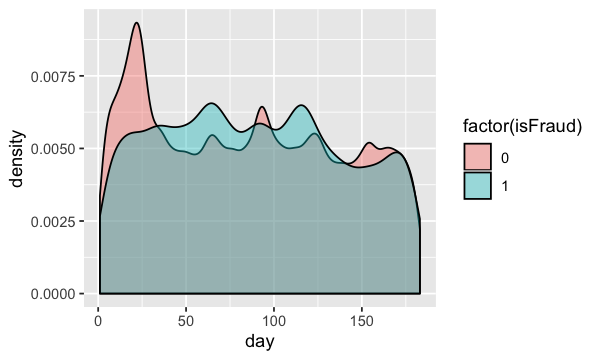

In [16]:
tr$day  <- tr$TransactionDT / 60 / 60 / 24
te$day  <- te$TransactionDT / 60 / 60 / 24
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(tr, aes(day, fill = factor(isFraud))) + geom_density(alpha = 0.4)


     C      H      R      S      W 
 68519  33024  37699  11628 439670 

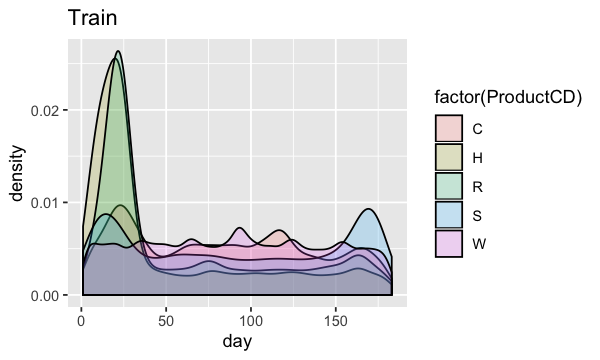

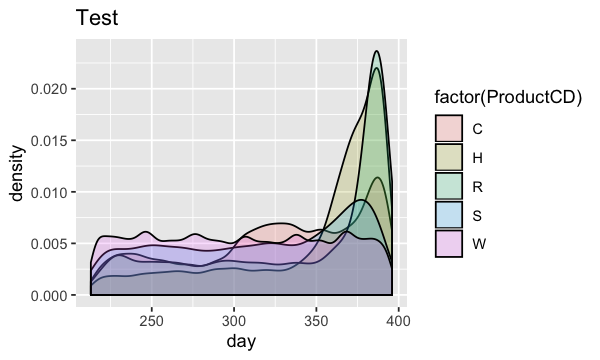

In [17]:
ggplot(tr, aes(day, fill = factor(ProductCD))) + geom_density(alpha = 0.2) + ggtitle("Train")
table(tr$ProductCD)

ggplot(te, aes(day, fill = factor(ProductCD))) + geom_density(alpha = 0.2) + ggtitle("Test")


                 american express         discover       mastercard 
            1577             8328             6651           189217 
            visa 
          384767 

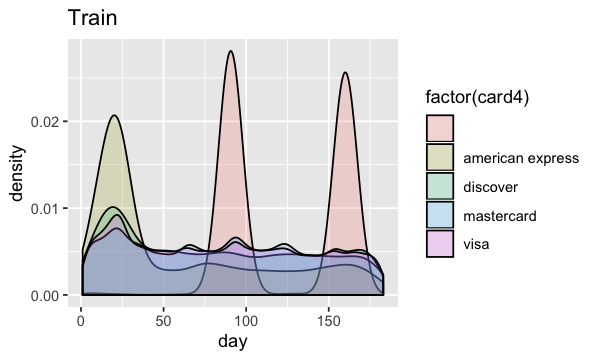

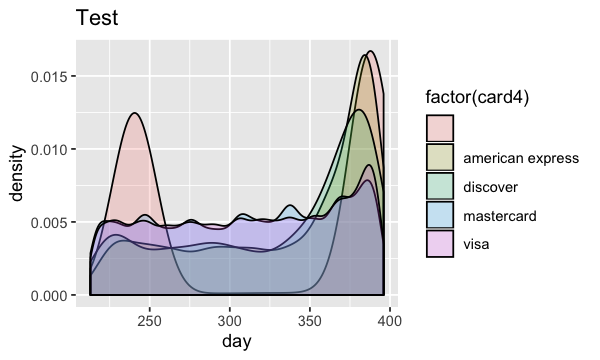

In [19]:
ggplot(tr, aes(day, fill = factor(card4))) + geom_density(alpha = 0.2) + ggtitle("Train")
table(tr$card4)
ggplot(te, aes(day, fill = factor(card4))) + geom_density(alpha = 0.2) + ggtitle("Test")


                    charge card          credit           debit debit or credit 
           1571              15          148986          439938              30 

Warning message:
“Groups with fewer than two data points have been dropped.”

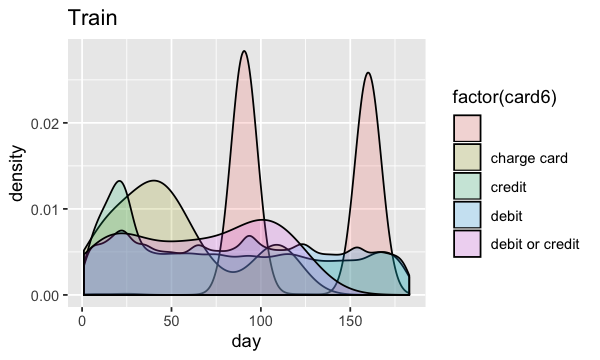

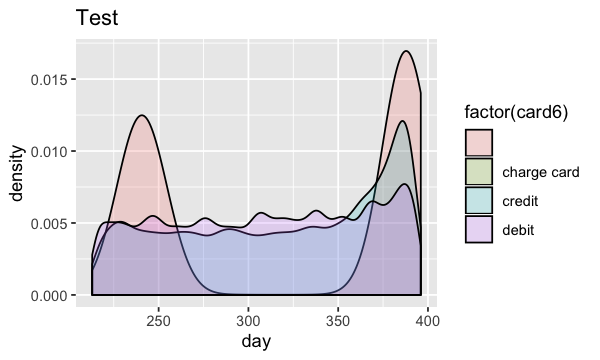

In [21]:
ggplot(tr, aes(day, fill = factor(card6))) + geom_density(alpha = 0.2) + ggtitle("Train")
table(tr$card6)
ggplot(te, aes(day, fill = factor(card6))) + geom_density(alpha = 0.2) + ggtitle("Test")

In [29]:
ex = tr[card4 == "american express"]
nrow(ex)

prop.table(table(ex$isFraud))

[1] 8328


         0          1 
0.97130163 0.02869837 

In [12]:
names(tr)

[1] "TransactionID"  "isFraud"        "TransactionDT"  "TransactionAmt"
  [5] "ProductCD"      "card1"          "card2"          "card3"         
  [9] "card4"          "card5"          "card6"          "addr1"         
 [13] "addr2"          "dist1"          "dist2"          "P_emaildomain" 
 [17] "R_emaildomain"  "C1"             "C2"             "C3"            
 [21] "C4"             "C5"             "C6"             "C7"            
 [25] "C8"             "C9"             "C10"            "C11"           
 [29] "C12"            "C13"            "C14"            "D1"            
 [33] "D2"             "D3"             "D4"             "D5"            
 [37] "D6"             "D7"             "D8"             "D9"            
 [41] "D10"            "D11"            "D12"            "D13"           
 [45] "D14"            "D15"            "M1"             "M2"            
 [49] "M3"             "M4"             "M5"             "M6"            
 [53] "M7"             "M8"             "M9"             "V1"            
 [57] "V2"             "V3"             "V4"             "V5"            
 [61] "V6"             "V7"             "V8"             "V9"            
 [65] "V10"            "V11"            "V12"            "V13"           
 [69] "V14"            "V15"            "V16"            "V17"           
 [73] "V18"            "V19"            "V20"            "V21"           
 [77] "V22"            "V23"            "V24"            "V25"           
 [81] "V26"            "V27"            "V28"            "V29"           
 [85] "V30"            "V31"            "V32"            "V33"           
 [89] "V34"            "V35"            "V36"            "V37"           
 [93] "V38"            "V39"            "V40"            "V41"           
 [97] "V42"            "V43"            "V44"            "V45"           
[101] "V46"            "V47"            "V48"            "V49"           
[105] "V50"            "V51"            "V52"            "V53"           
[109] "V54"            "V55"            "V56"            "V57"           
[113] "V58"            "V59"            "V60"            "V61"           
[117] "V62"            "V63"            "V64"            "V65"           
[121] "V66"            "V67"            "V68"            "V69"           
[125] "V70"            "V71"            "V72"            "V73"           
[129] "V74"            "V75"            "V76"            "V77"           
[133] "V78"            "V79"            "V80"            "V81"           
[137] "V82"            "V83"            "V84"            "V85"           
[141] "V86"            "V87"            "V88"            "V89"           
[145] "V90"            "V91"            "V92"            "V93"           
[149] "V94"            "V95"            "V96"            "V97"           
[153] "V98"            "V99"            "V100"           "V101"          
[157] "V102"           "V103"           "V104"           "V105"          
[161] "V106"           "V107"           "V108"           "V109"          
[165] "V110"           "V111"           "V112"           "V113"          
[169] "V114"           "V115"           "V116"           "V117"          
[173] "V118"           "V119"           "V120"           "V121"          
[177] "V122"           "V123"           "V124"           "V125"          
[181] "V126"           "V127"           "V128"           "V129"          
[185] "V130"           "V131"           "V132"           "V133"          
[189] "V134"           "V135"           "V136"           "V137"          
[193] "V138"           "V139"           "V140"           "V141"          
[197] "V142"           "V143"           "V144"           "V145"          
[201] "V146"           "V147"           "V148"           "V149"          
[205] "V150"           "V151"           "V152"           "V153"          
[209] "V154"           "V155"           "V156"           "V157"          
[213] "V158"           "V159"           "V160"           "V161"          
[217] 

In [3]:
tr <- fread("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
te <- fread("/Users/jeong/downloads/IEEE/input/test_transaction.csv")

In [4]:
summary(tr)

 TransactionID        isFraud        TransactionDT      TransactionAmt    
 Min.   :2987000   Min.   :0.00000   Min.   :   86400   Min.   :    0.25  
 1st Qu.:3134635   1st Qu.:0.00000   1st Qu.: 3027058   1st Qu.:   43.32  
 Median :3282270   Median :0.00000   Median : 7306528   Median :   68.77  
 Mean   :3282270   Mean   :0.03499   Mean   : 7372311   Mean   :  135.03  
 3rd Qu.:3429904   3rd Qu.:0.00000   3rd Qu.:11246620   3rd Qu.:  125.00  
 Max.   :3577539   Max.   :1.00000   Max.   :15811131   Max.   :31937.39  
                                                                          
  ProductCD             card1           card2           card3      
 Length:590540      Min.   : 1000   Min.   :100.0   Min.   :100.0  
 Class :character   1st Qu.: 6019   1st Qu.:214.0   1st Qu.:150.0  
 Mode  :character   Median : 9678   Median :361.0   Median :150.0  
                    Mean   : 9899   Mean   :362.6   Mean   :153.2  
                    3rd Qu.:14184   3rd Qu.:512.0   3rd Qu.:

In [ ]:
279, 280, 284, 285, 286, 287, 290, 291, 292, 293, 294, 295, 297, 298, 299, 302, 303, 304, 305, 306, 307, 308, 309, 310,
311, 312, 416, 317, 318, 319, 320, 321


281, 282, 283, 288, 289, 296, 300, 301, 313, 314, 315,